олучить график распределения длин гэпов в выравнивании по всем сиквенсам. Посчитать процент консервативных (неизменных) позиций в выравнивании. Определить, что это за аминокислоты (барплот построить можно - Х - аминокислоты, Y - сколько раз была консервативной)

In [3]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ete3
from ete3 import PhyloTree
from Bio import SeqIO

In [7]:
mulal = SeqIO.parse("./muscle_res_prot_blastx.fasta", "fasta")
lengths = []
for rec in mulal:
    seq = str(rec.seq)
    gaps = re.findall("-+", seq)
    for g in gaps:
        lengths.append(len(g))

plt.figure(figsize=(12, 8))
plt.hist(lengths, bins=100);


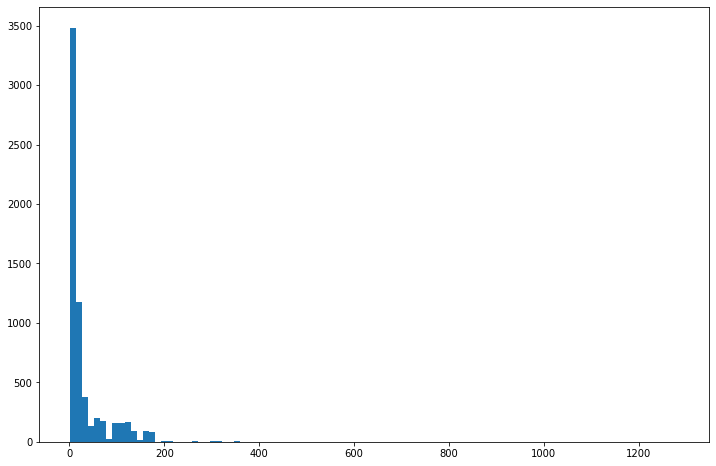

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(lengths, bins=100);

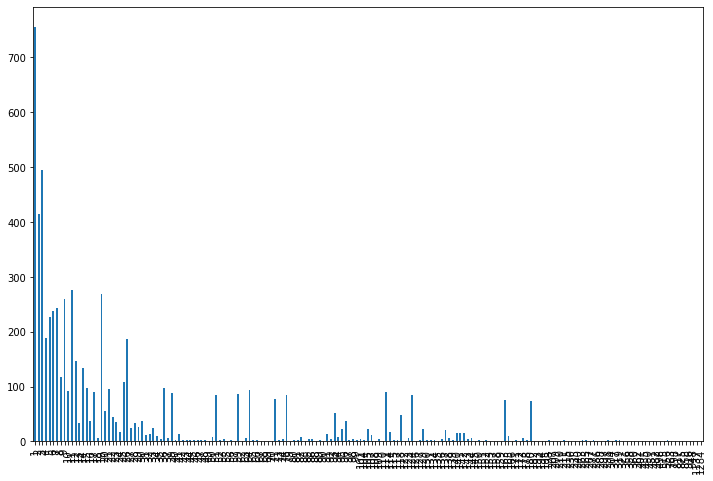

In [22]:
plt.figure(figsize=(12, 8))
pd.Series(lengths).value_counts().sort_index().plot.bar();

In [23]:
from collections import defaultdict

In [24]:
mulal = SeqIO.parse("./muscle_res_prot_blastx.fasta", "fasta")

conserv = defaultdict(set)
for rec in mulal:
    seq = str(rec.seq)
    for pos, aa in enumerate(seq):
        conserv[pos].add(aa)

In [29]:
for pos, aset in conserv.items():
    if len(aset) == 1:
        print(pos, aset)

In [44]:
mulal = SeqIO.parse("./muscle_res_prot_blastx.fasta", "fasta")


conserv = defaultdict(dict)
for rec in mulal:
    seq = str(rec.seq)
    for pos, aa in enumerate(seq):
        intermediate_dct = conserv[pos]
        if aa in intermediate_dct:
            intermediate_dct[aa] += 1
        else:
            intermediate_dct[aa] = 1

In [46]:
conserv = pd.DataFrame(conserv).fillna(0).T
conserv.drop("-", axis=1, inplace=True)

In [52]:
conserv

,M,R,F,K,G,N,E,P,T,D,...,A,W,S,Y,L,H,Q,I,C,X
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
conserv.sum(axis=0)

M     404.0
R    1453.0
F    1215.0
K    1826.0
G    2345.0
N    1048.0
E    1694.0
P    1035.0
T    1216.0
D    1280.0
V    1999.0
A    2936.0
W     418.0
S    2919.0
Y     729.0
L    2703.0
H     703.0
Q    1043.0
I    1632.0
C     384.0
X      11.0
dtype: float64

In [57]:
conserv.loc[conserv.sum(axis=1) > 80].

,M,R,F,K,G,N,E,P,T,D,...,A,W,S,Y,L,H,Q,I,C,X
96,37.0,3.0,3.0,18.0,0.0,6.0,0.0,4.0,2.0,0.0,...,1.0,1.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
97,0.0,9.0,13.0,41.0,0.0,2.0,1.0,2.0,5.0,0.0,...,5.0,0.0,1.0,3.0,4.0,0.0,4.0,0.0,1.0,0.0
98,1.0,2.0,3.0,0.0,14.0,1.0,0.0,1.0,0.0,1.0,...,4.0,2.0,6.0,8.0,17.0,1.0,0.0,21.0,0.0,0.0
99,0.0,0.0,18.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,2.0,44.0,1.0,0.0,7.0,0.0,0.0
100,2.0,3.0,2.0,4.0,3.0,1.0,0.0,2.0,1.0,1.0,...,25.0,1.0,1.0,1.0,15.0,1.0,2.0,12.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1.0,0.0,12.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,67.0,0.0,1.0,1.0,1.0,0.0,0.0
2336,2.0,3.0,0.0,0.0,15.0,7.0,0.0,1.0,2.0,0.0,...,2.0,1.0,50.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
2337,1.0,1.0,0.0,2.0,63.0,2.0,1.0,1.0,2.0,1.0,...,9.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2338,0.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3.0,36.0,3.0,10.0,24.0,0.0,0.0,0.0
